# Capstone Project

## Fatal Police Shooting in the United States

#### Author: Fuad Yagci

###### Import dependancies, read csv files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [326]:
df = pd.read_csv("/Users/fuadyagci/Downloads/database.csv", index_col=0)

In [319]:
df.head(10)

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
id,,,,,,,,,,,,,
3,Tim Elliot,2015-01-02,shot,Other,53.0,M,A,Shelton,WA,True,attack,Not fleeing,Other
4,Lewis Lee Lembke,2015-01-02,shot,Other,47.0,M,W,Aloha,OR,False,attack,Not fleeing,Other
5,John Paul Quintero,2015-01-03,shot and Tasered,Unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,Other
8,Matthew Hoffman,2015-01-04,shot,Other,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,Other
9,Michael Rodriguez,2015-01-04,shot,Other,39.0,M,H,Evans,CO,False,attack,Not fleeing,Other
11,Kenneth Joe Brown,2015-01-04,shot,Other,18.0,M,W,Guthrie,OK,False,attack,Not fleeing,Other
13,Kenneth Arnold Buck,2015-01-05,shot,Other,22.0,M,H,Chandler,AZ,False,attack,Car,Other
15,Brock Nichols,2015-01-06,shot,Other,35.0,M,W,Assaria,KS,False,attack,Not fleeing,Other
16,Autumn Steele,2015-01-06,shot,Unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,Other


In [256]:
df3 = pd.read_csv("/Users/fuadyagci/Downloads/state_populations.csv", sep=';', decimal=',')
df3['Native'] = df3['Native'].astype(str).str.replace('.', ',')

df3.head()

,State,Total population,Hispanic,White,Black,Asian,Native
0,AL,"4,874,747","201,97","3,191,450","1,302,295","65,494","22,209"
1,AK,"739,795","51,712","448,081","21,192","48,569","105,146"
2,AZ,"7,016,270","2,202,173","3,836,639","290,379","225,81","274,496"
3,AR,"3,004,279","223,764","2,173,307","455,5","46,583","16,901"
4,CA,"39,536,653","15,477,306","14,616,636","2,164,239","5,679,986","147,88"


##### Prepearing second dataset (Removing semicolons and changing values into float type)

In [306]:
df3["Hispanic"] = df3["Hispanic"].str.replace(',', '').astype(float)
df3["Native"] = df3["Native"].str.replace(',', '').astype(float)
df3["Total population"] = df3["Total population"].str.replace(',', '').astype(float)
df3["White"] = df3["White"].str.replace(',', '').astype(float)
df3["Asian"] = df3["Asian"].str.replace(',', '').astype(float)
df3["Black"] = df3["Black"].str.replace(',', '').astype(float)

### How many observations are there in this dataset?

### How many features this dataset has?

In [268]:
rows, columns = df.shape
print(f"There are {rows} observations and {columns} features in the dataset.")

There are 2142 observations and 13 features in the dataset.


### Which of the features are categorical?

### Which of the features are numeric?

In [307]:
print(df.dtypes)
print("--------------------------------")
print(df3.info())

name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object
--------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             51 non-null     object 
 1   Total population  51 non-null     float64
 2   Hispanic          51 non-null     float64
 3   White             51 non-null     float64
 4   Black             51 non-null     float64
 5   Asian             51 non-null     float64
 6   Native         

### Data Cleaning 

#### Missing Values

In [277]:
print(df.isnull().sum())
print("Total Missing Values:" , df.isnull().sum().sum())
print("--------------------------------")
print(df3.isnull().sum())
print("Total Missing Values:" , df3.isnull().sum().sum())

name                        19
date                         0
manner_of_death              0
armed                        0
age                         43
gender                       1
race                       103
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        36
body_camera                  0
dtype: int64
Total Missing Values: 202
--------------------------------
State               0
Total population    0
Hispanic            0
White               0
Black               0
Asian               0
Native              0
dtype: int64
Total Missing Values: 0


#### Checking Duplicate Rows

In [280]:
duplicates_mask = df.duplicated()
duplicates = df[duplicates_mask]

print(duplicates.head())

                     name        date manner_of_death  armed   age gender   
id                                                                          
2294  Jamake Cason Thomas  2017-02-03            shot  Other  22.0      M  \

     race     city state  signs_of_mental_illness threat_level flee   
id                                                                    
2294    B  Rowland    NC                    False       attack  Car  \

      body_camera  
id                 
2294        False  


##### There is one duplicate row -> Jamake Cason

In [282]:
df = df.drop_duplicates()

duplicates_mask = df.duplicated()
duplicates = df[duplicates_mask]

print(duplicates.head())

Empty DataFrame
Columns: [name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee, body_camera]
Index: []


In [290]:
f = df['gender'] == 'F'
m = df['gender'] == 'M'
print("Killings Based on Gender")
print({'Female': sum(f), 'Male': sum(m)})

Killings Based on Gender
{'Female': 89, 'Male': 2051}


In [292]:
print(df.date.min())
print(df.date.max())

2015-01-02
2017-02-28


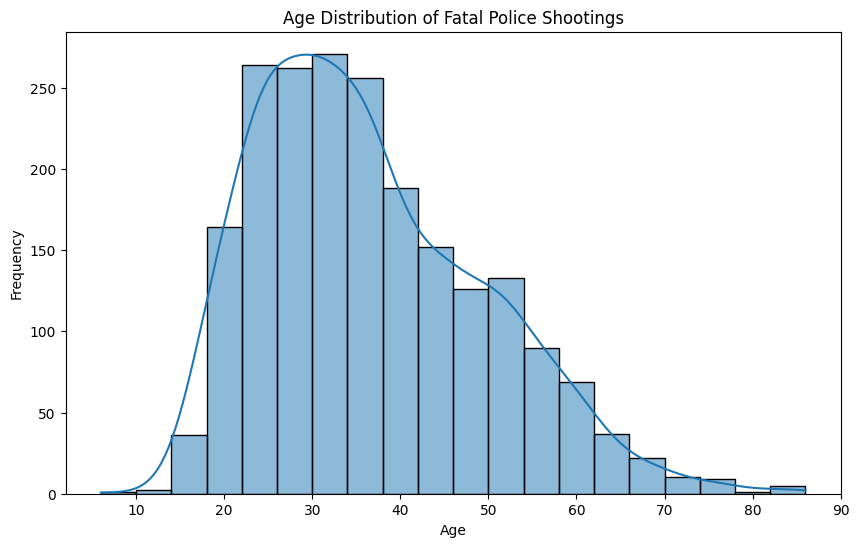

In [300]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution of Fatal Police Shootings')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Killed People According to Races')

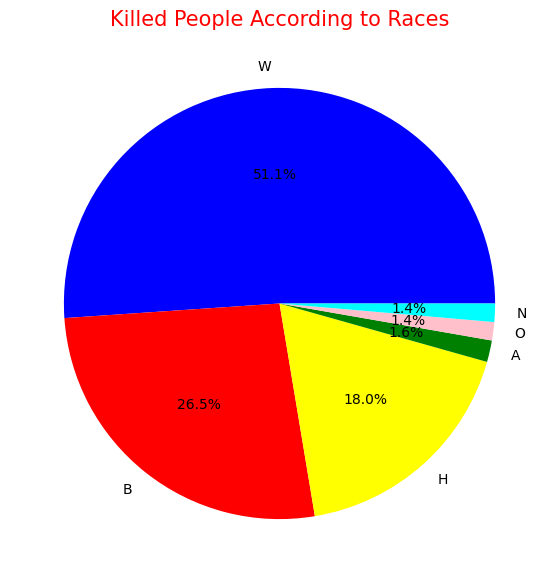

In [284]:
df.race.dropna(inplace=True)
labels = df.race.value_counts().index
colors = ["blue","red","yellow","green","pink","cyan"]
explode = [0]*6
sizes = df.race.value_counts().values

plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Killed People According to Races",color="red",fontsize=15)

<Figure size 1200x800 with 0 Axes>

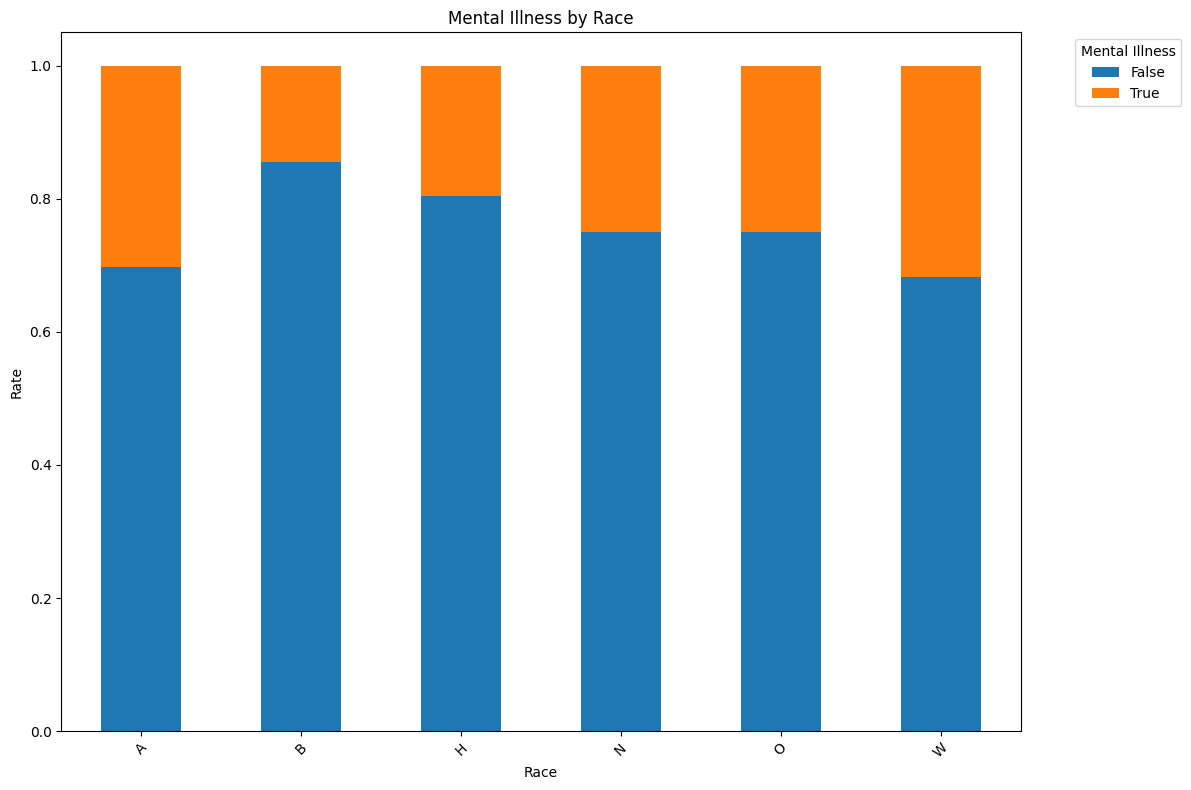

In [302]:
race_rate = df.groupby(['race', 'signs_of_mental_illness']).size().unstack(fill_value=0)

race_total = race_rate.sum(axis=1)

race_rates_all = race_rate.div(race_total, axis=0)

plt.figure(figsize=(12, 8))

race_rates_all.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Mental Illness by Race')
plt.xlabel('Race')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend(title='Mental Illness', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

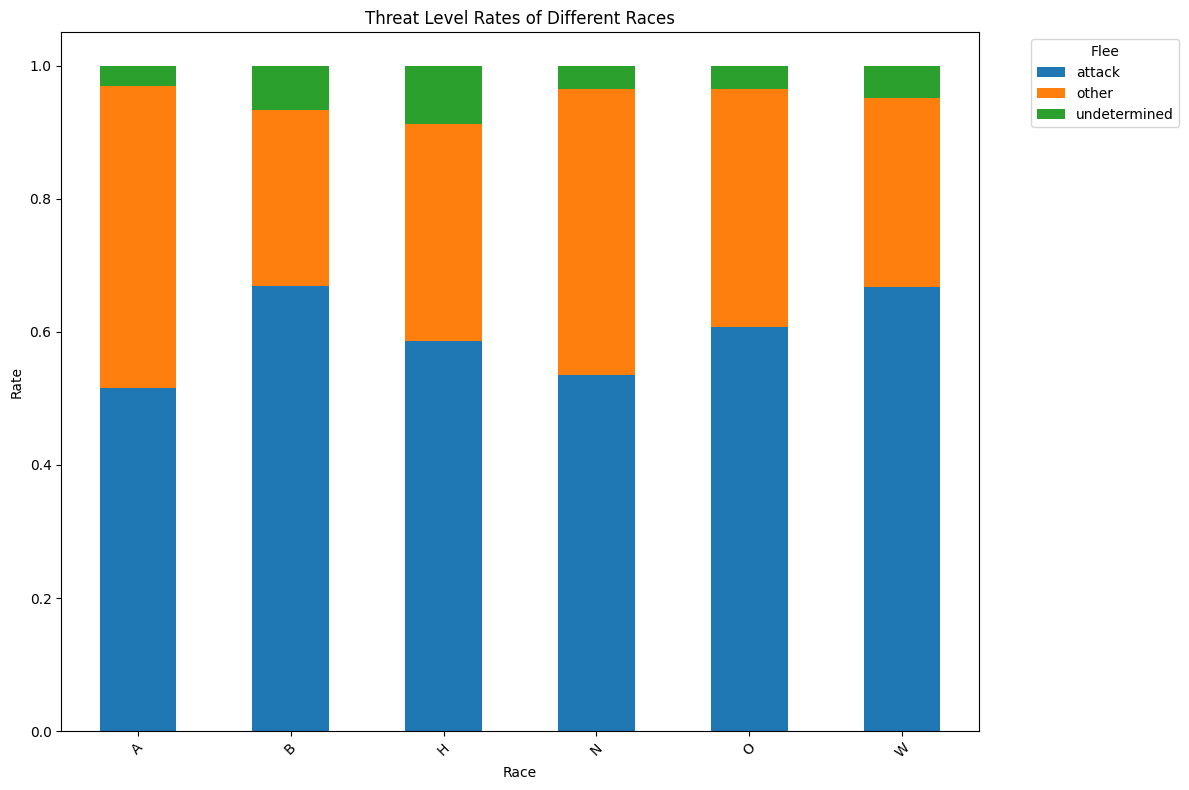

In [299]:
race_rate = df.groupby(['race', 'threat_level']).size().unstack(fill_value=0)

race_total = race_rate.sum(axis=1)
race_rates_all = race_rate.div(race_total, axis=0)

plt.figure(figsize=(12, 8))

race_rates_all.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Threat Level Rates of Different Races')
plt.xlabel('Race')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend(title='Flee', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

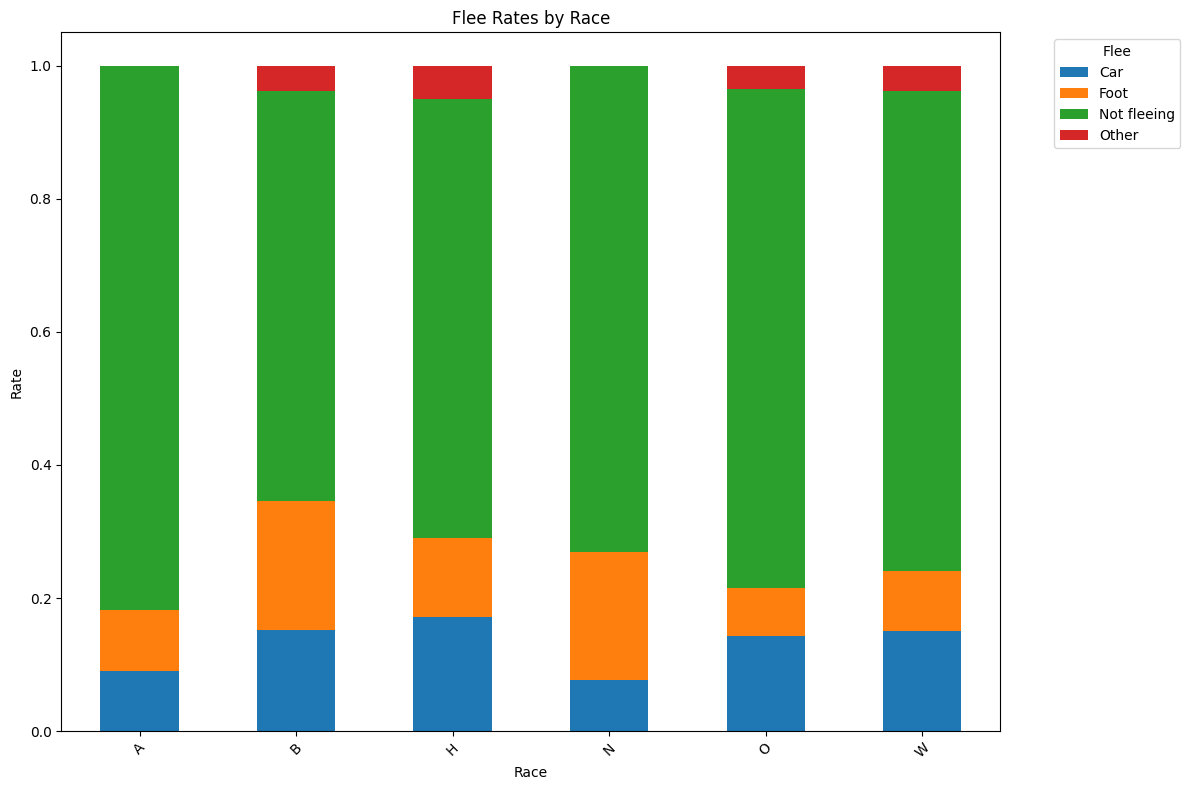

In [298]:
irk_oranlari = df.groupby(['race', 'flee']).size().unstack(fill_value=0)

irk_toplami = irk_oranlari.sum(axis=1)

irk_oranlari_oransal = irk_oranlari.div(irk_toplami, axis=0)

plt.figure(figsize=(12, 8))

irk_oranlari_oransal.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Flee Rates by Race')
plt.xlabel('Race')
plt.ylabel('Rate')
plt.xticks(rotation=45)
plt.legend(title='Flee', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

race
W    0.510795
B    0.265456
H    0.180079
A    0.016192
O    0.013739
N    0.013739
Name: proportion, dtype: float64


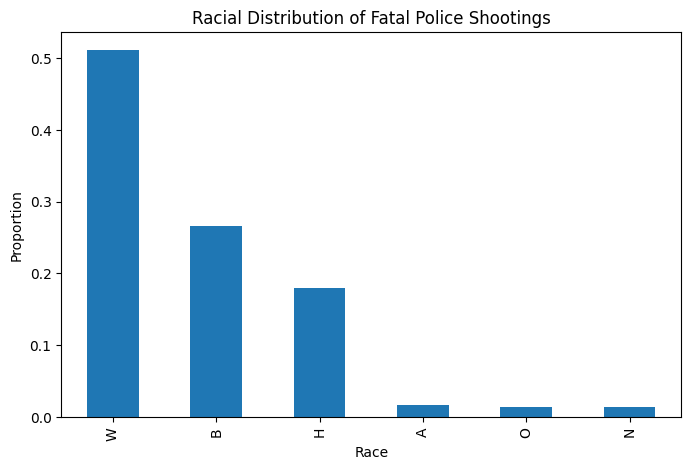

In [309]:
race_counts = df['race'].value_counts(normalize=True)
print(race_counts)

plt.figure(figsize=(8, 5))
race_counts.plot(kind='bar')
plt.title('Racial Distribution of Fatal Police Shootings')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.show()

Please Select Statistical Model:
1. Rate
2. Numerical


Please Select (1 or 2):  2


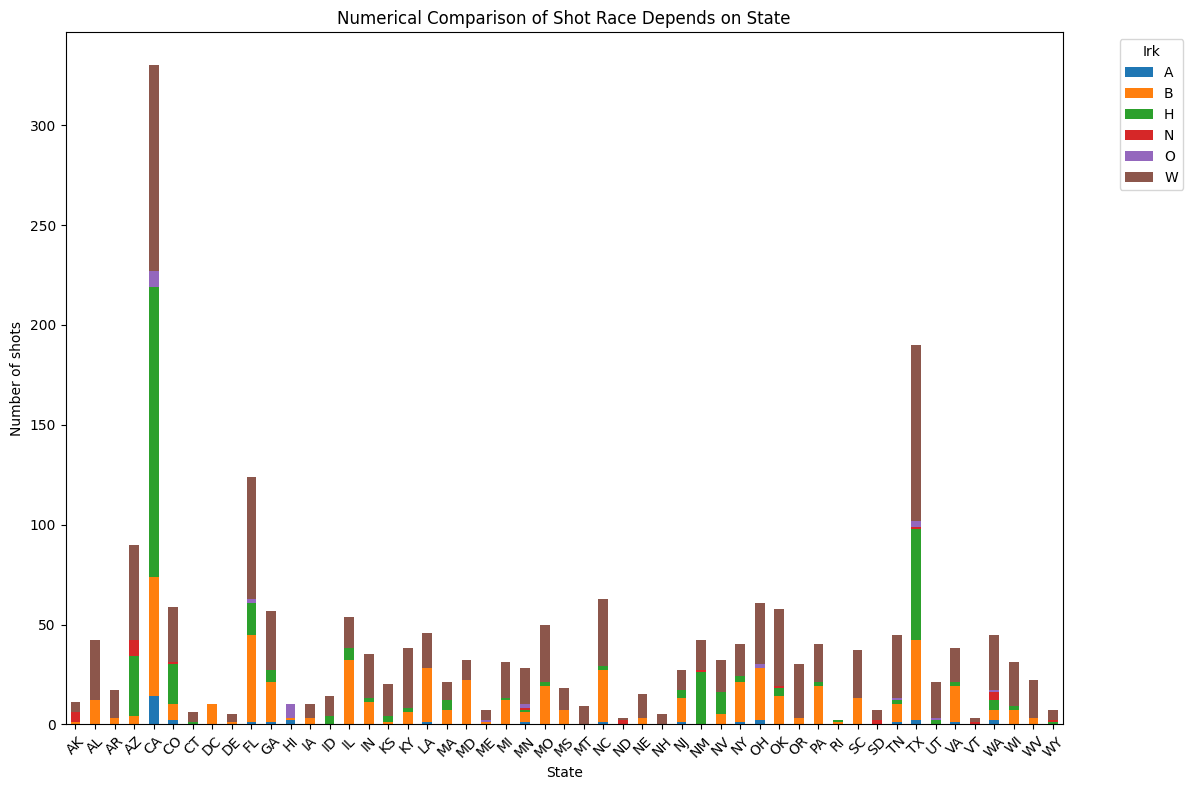

In [311]:
def irk_oranlamasi():
    irk_oranlari = df.groupby(['state', 'race']).size().unstack(fill_value=0)
    
    eyalet_toplam = irk_oranlari.sum(axis=1)
    irk_oranlari_oransal = irk_oranlari.div(eyalet_toplam, axis=0)
    
    irk_oranlari_oransal.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Eyaletlere Göre Öldürülen Irk Oranlaması')
    plt.xlabel('State')
    plt.ylabel('Rate')
    plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def irk_sayisal_karsilastirma():
    irk_sayilari = df.groupby(['state', 'race']).size().unstack(fill_value=0)
    
    irk_sayilari.plot(kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Numerical Comparison of Shot Race Depends on State')
    plt.xlabel('State')
    plt.ylabel('Number of shots')
    plt.legend(title='Irk', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

print("Please Select Statistical Model:")
print("1. Rate")
print("2. Numerical")
secim = input("Please Select (1 or 2): ")

if secim == '1':
    irk_oranlamasi()
elif secim == '2':
    irk_sayisal_karsilastirma()
else:
    print("Invalid Selection! Please enter 1 or 2.")

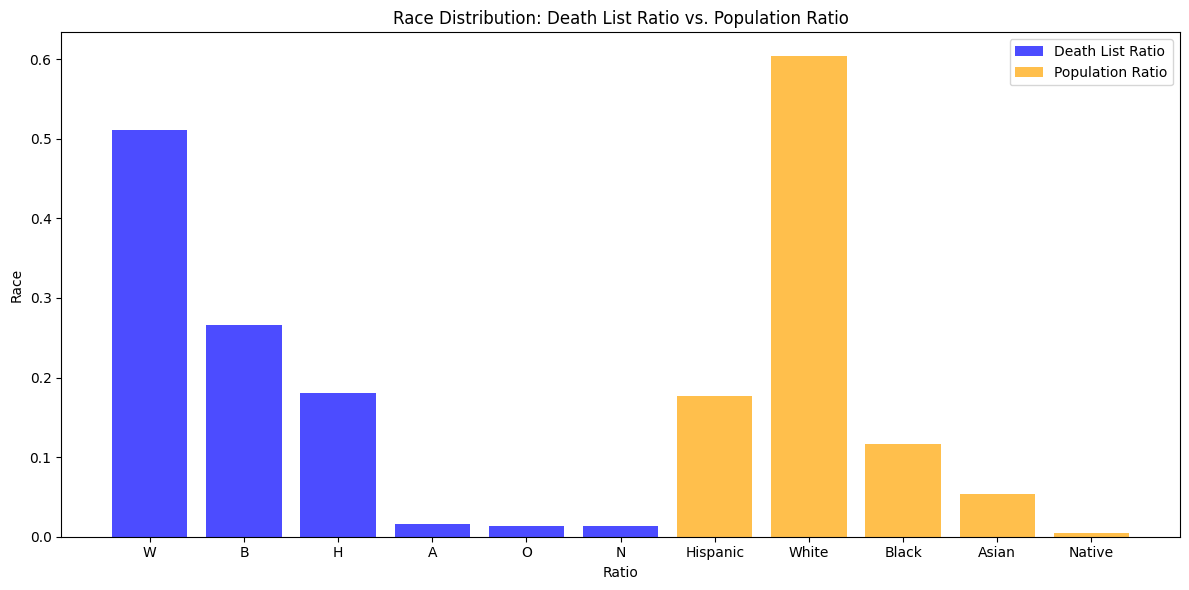

In [188]:
race_death_counts = df['race'].value_counts(normalize=True)

total_population = df3["Total population"].sum()
race_population_ratios = df3.sum()[2:] / total_population 

plt.figure(figsize=(12, 6))

plt.bar(race_death_counts.index, race_death_counts.values, color='blue', alpha=0.7, label='Death List Ratio')

plt.bar(race_population_ratios.index, race_population_ratios.values, color='orange', alpha=0.7, label='Population Ratio')

plt.title("Race Distribution: Death List Ratio vs. Population Ratio")
plt.xlabel("Ratio")
plt.ylabel("Race")

plt.legend()
plt.tight_layout()
plt.show()

In [189]:
df.race.value_counts(normalize=True)

race
W    0.510544
B    0.265817
H    0.179990
A    0.016184
O    0.013732
N    0.013732
Name: proportion, dtype: float64

In [201]:
death_counts_by_race = df['race'].value_counts()

pro = {
    'White': [death_counts_by_race['W'] / df3['White'].sum()],
    'Black': [death_counts_by_race['B'] / df3['Black'].sum()],
    'Hispanic': [death_counts_by_race['H'] / df3['Hispanic'].sum()],
    'Asian': [death_counts_by_race['A'] / df3['Asian'].sum()],
    'Native American': [death_counts_by_race['N'] / df3['Native'].sum()]
}

prop = pd.DataFrame(data=pro)
prop



28
1727814.0


,White,Black,Hispanic,Asian,Native American
0,0.000005,0.000014,0.000006,0.000002,0.000016


state
CA    355
TX    197
FL    129
AZ     95
OK     65
Name: count, dtype: int64


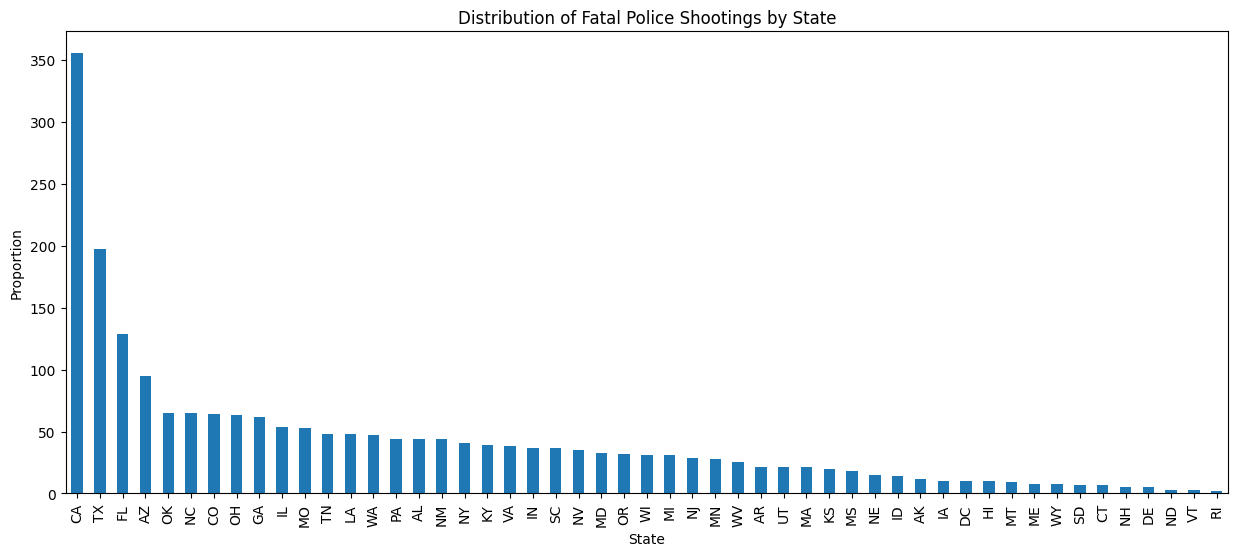

In [206]:
state_counts = df['state'].value_counts(normalize=True)
print(state_counts.head())

plt.figure(figsize=(15, 6))
state_counts.plot(kind='bar')
plt.title('Distribution of Fatal Police Shootings by State')
plt.xlabel('State')
plt.ylabel('Proportion')
plt.show()

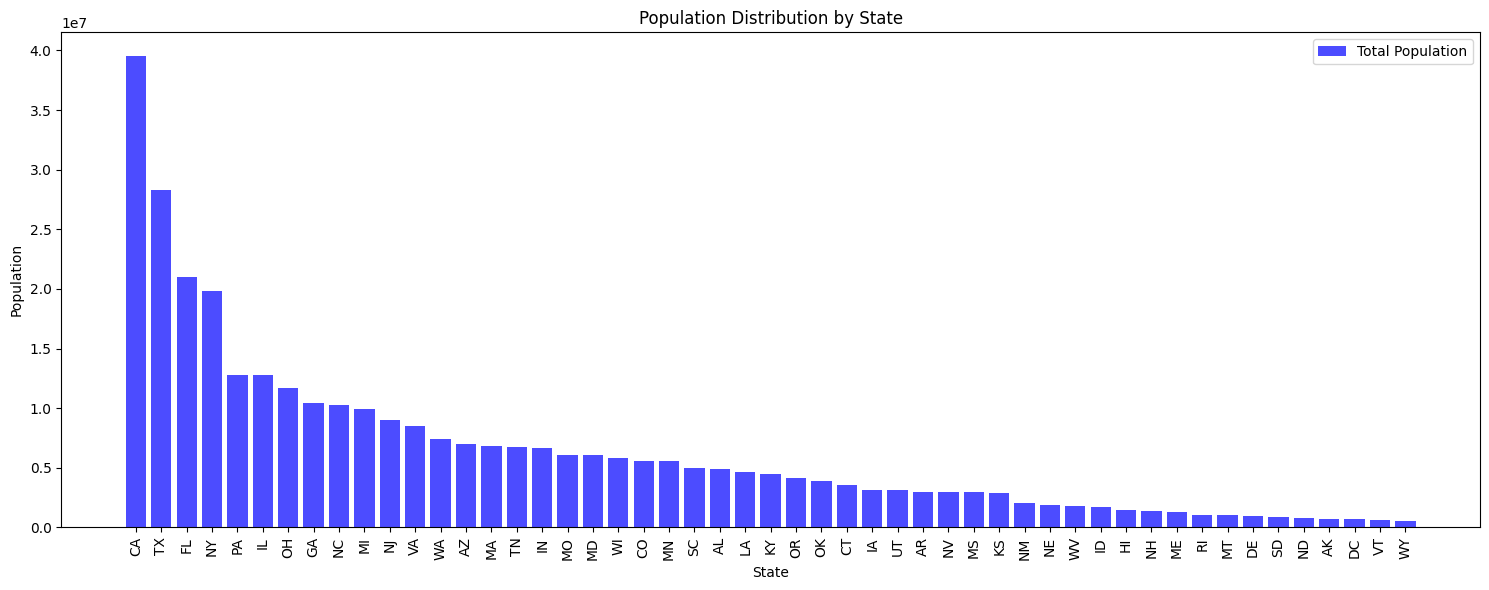

In [228]:

df_population_sorted = df3.sort_values(by="Total population", ascending=False)

plt.figure(figsize=(15, 6))

plt.bar(df_population_sorted["State"], df_population_sorted["Total population"], color='blue', alpha=0.7, label='Total Population')

plt.title("Population Distribution by State")
plt.xlabel("State")
plt.ylabel("Population")

plt.xticks(rotation=90)

plt.legend()

plt.tight_layout()
plt.show()

In [312]:
death_counts_by_state = df['state'].value_counts()

state_death_ratios = {}
for state in df3['State'].unique():
    death_ratio = death_counts_by_state[state] / df3[df3['State'] == state]['Total population'].sum()
    state_death_ratios[state] = death_ratio

prop = pd.DataFrame(data=state_death_ratios.values(), index=state_death_ratios.keys(), columns=['Death Ratio'])
print(prop['Death Ratio'].sort_values())




RI    0.000002
CT    0.000002
NY    0.000002
MA    0.000003
MI    0.000003
IA    0.000003
NJ    0.000003
PA    0.000003
NH    0.000004
ND    0.000004
IL    0.000004
VA    0.000004
VT    0.000005
MN    0.000005
DE    0.000005
WI    0.000005
OH    0.000005
MD    0.000005
IN    0.000006
GA    0.000006
ME    0.000006
MS    0.000006
FL    0.000006
NC    0.000006
WA    0.000006
UT    0.000007
KS    0.000007
TX    0.000007
AR    0.000007
HI    0.000007
TN    0.000007
SC    0.000007
OR    0.000008
NE    0.000008
SD    0.000008
ID    0.000008
MT    0.000009
MO    0.000009
KY    0.000009
CA    0.000009
AL    0.000009
LA    0.000010
CO    0.000011
NV    0.000012
AZ    0.000014
WV    0.000014
WY    0.000014
DC    0.000014
AK    0.000016
OK    0.000017
NM    0.000021
Name: Death Ratio, dtype: float64


In [349]:
with open("/Users/fuadyagci/Downloads/gun_ownership.csv", "r") as file:
    header = file.readline()
    lines = file.readlines()
    data = [line.split(";") for line in lines]

df4 = pd.DataFrame(data)

print(df4.head())




    0   1      2             3              4              5     6
0  "1  MT  65.7%   33.2 per 1k  20.9 per 100k  Republican"\n  None
1  "2  WY  60.7%  245.8 per 1k  25.9 per 100k  Republican"\n  None
2  "3  WV  60.6%   92.8 per 1k  18.1 per 100k  Republican"\n  None
3  "4  ID  57.8%   40.2 per 1k  17.6 per 100k  Republican"\n  None
4  "5  AL  57.2%   38.5 per 1k  23.5 per 100k  Republican"\n  None


  Index State Gun Ownership Rate Registered Gun Rate Gun Death Rate   
0    "1    MT              65.7%         33.2 per 1k  20.9 per 100k  \
1    "2    WY              60.7%        245.8 per 1k  25.9 per 100k   
2    "3    WV              60.6%         92.8 per 1k  18.1 per 100k   
3    "4    ID              57.8%         40.2 per 1k  17.6 per 100k   
4    "5    AL              57.2%         38.5 per 1k  23.5 per 100k   

   Red or Blue  None  
0  Republican"  None  
1  Republican"  None  
2  Republican"  None  
3  Republican"  None  
4  Republican"  None  


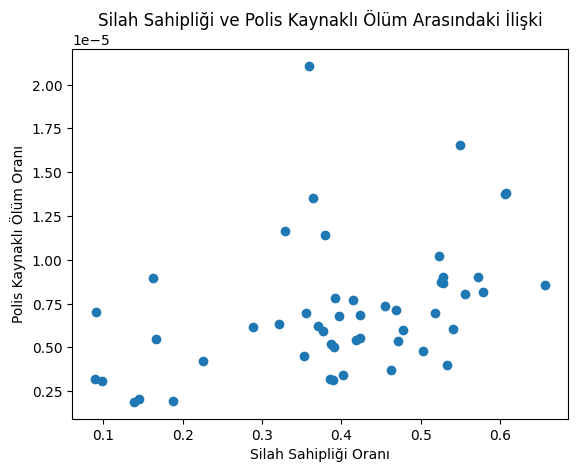

Pearson Korelasyon Katsayısı: 0.39964283634495446
İlişki zayıf veya yok.


In [351]:
import pandas as pd

with open("/Users/fuadyagci/Downloads/gun_ownership.csv", "r") as file:
    header = file.readline()
    lines = file.readlines()
    data = [line.strip().split(";") for line in lines]

df4 = pd.DataFrame(data)

df4.columns = ["Index", "State", "Gun Ownership Rate", "Registered Gun Rate", "Gun Death Rate", "Red or Blue","None"]

print(df4.head())

df4["Gun Ownership Rate"] = df4["Gun Ownership Rate"].str.rstrip('%').astype(float) / 100

prop['Death Ratio'] = prop['Death Ratio'].astype(float)

merged_df = pd.merge(df4, prop, left_on="State", right_index=True)


plt.scatter(merged_df["Gun Ownership Rate"], merged_df['Death Ratio'])
plt.xlabel('Gun Ownership Rate')
plt.ylabel('Fatal Police Shootings')
plt.title('Relationship of Gun Ownership Rate and Fatal Police Shootings')
plt.show()

correlation = merged_df["Gun Ownership Rate"].corr(merged_df['Death Ratio'])
print("Pearson Correlation:", correlation)

if correlation > 0.5:
    print("Strong positive.")
elif correlation < -0.5:
    print("Strong Negative.")
else:
    print("Weak or no correlation.")


In [356]:
print(merged_df)

   Index State  Gun Ownership Rate Registered Gun Rate Gun Death Rate   
0     "1    MT               0.657         33.2 per 1k  20.9 per 100k  \
1     "2    WY               0.607        245.8 per 1k  25.9 per 100k   
2     "3    WV               0.606         92.8 per 1k  18.1 per 100k   
3     "4    ID               0.578         40.2 per 1k  17.6 per 100k   
4     "5    AL               0.572         38.5 per 1k  23.5 per 100k   
9    "10    AL               0.528         38.7 per 1k  23.6 per 100k   
5     "6    SD               0.556         72.2 per 1k  13.6 per 100k   
6     "7    OK               0.549         25.9 per 1k  20.7 per 100k   
7     "8    MS               0.541         27.4 per 1k  28.6 per 100k   
8     "9    ND               0.533           40 per 1k  13.8 per 100k   
10   "11    MO               0.528         18.4 per 1k  23.9 per 100k   
11   "12    KY               0.525         24.1 per 1k  20.1 per 100k   
12   "13    LA               0.523         32.9 per

/var/folders/wn/2k_qn2g548j9qnrs33fdnlrh0000gn/T/ipykernel_42816/3124979874.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=body_camera_counts.index, y=body_camera_counts.values, palette='Set2')


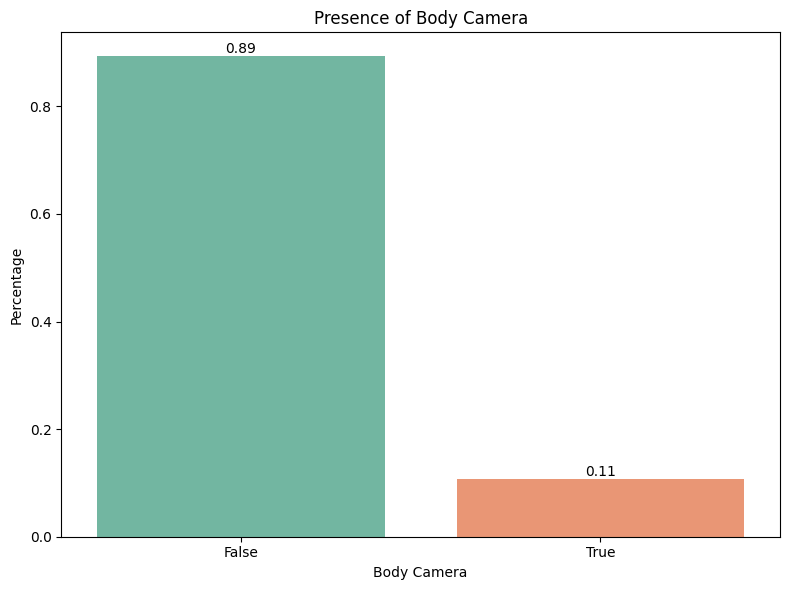

In [338]:
plt.figure(figsize=(8, 6))

body_camera_counts = df['body_camera'].value_counts(normalize=True)

sns.barplot(x=body_camera_counts.index, y=body_camera_counts.values, palette='Set2')

for index, value in enumerate(body_camera_counts.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.title('Presence of Body Camera')
plt.xlabel('Body Camera')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])

plt.tight_layout()
plt.show()

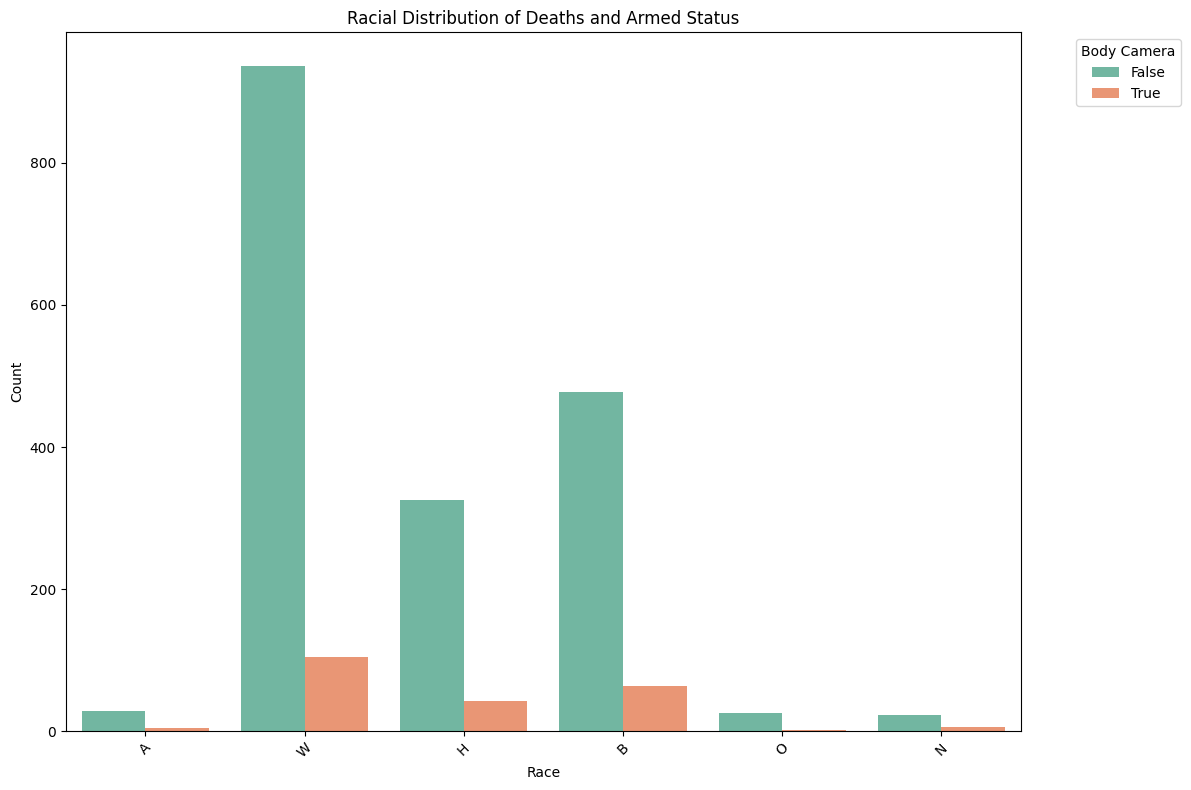

In [296]:

plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='race', hue='body_camera', palette='Set2')
plt.title('Racial Distribution of Deaths and Armed Status')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Body Camera', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




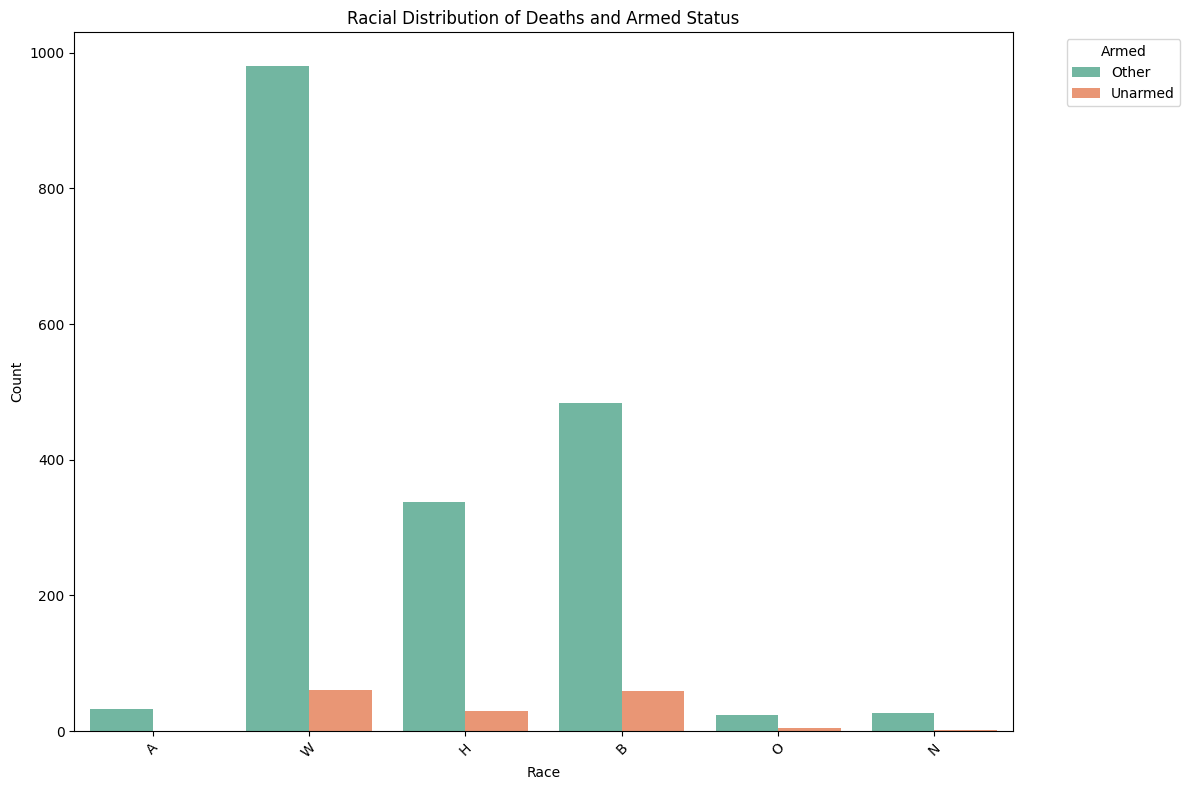

In [257]:
df4= df
df4['armed'] = df['armed'].apply(lambda x: 'Unarmed' if x == 'unarmed' else 'Other')

plt.figure(figsize=(12, 8))

sns.countplot(data=df4, x='race', hue='armed', palette='Set2')
plt.title('Racial Distribution of Deaths and Armed Status')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Armed', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

/var/folders/wn/2k_qn2g548j9qnrs33fdnlrh0000gn/T/ipykernel_42816/455517943.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


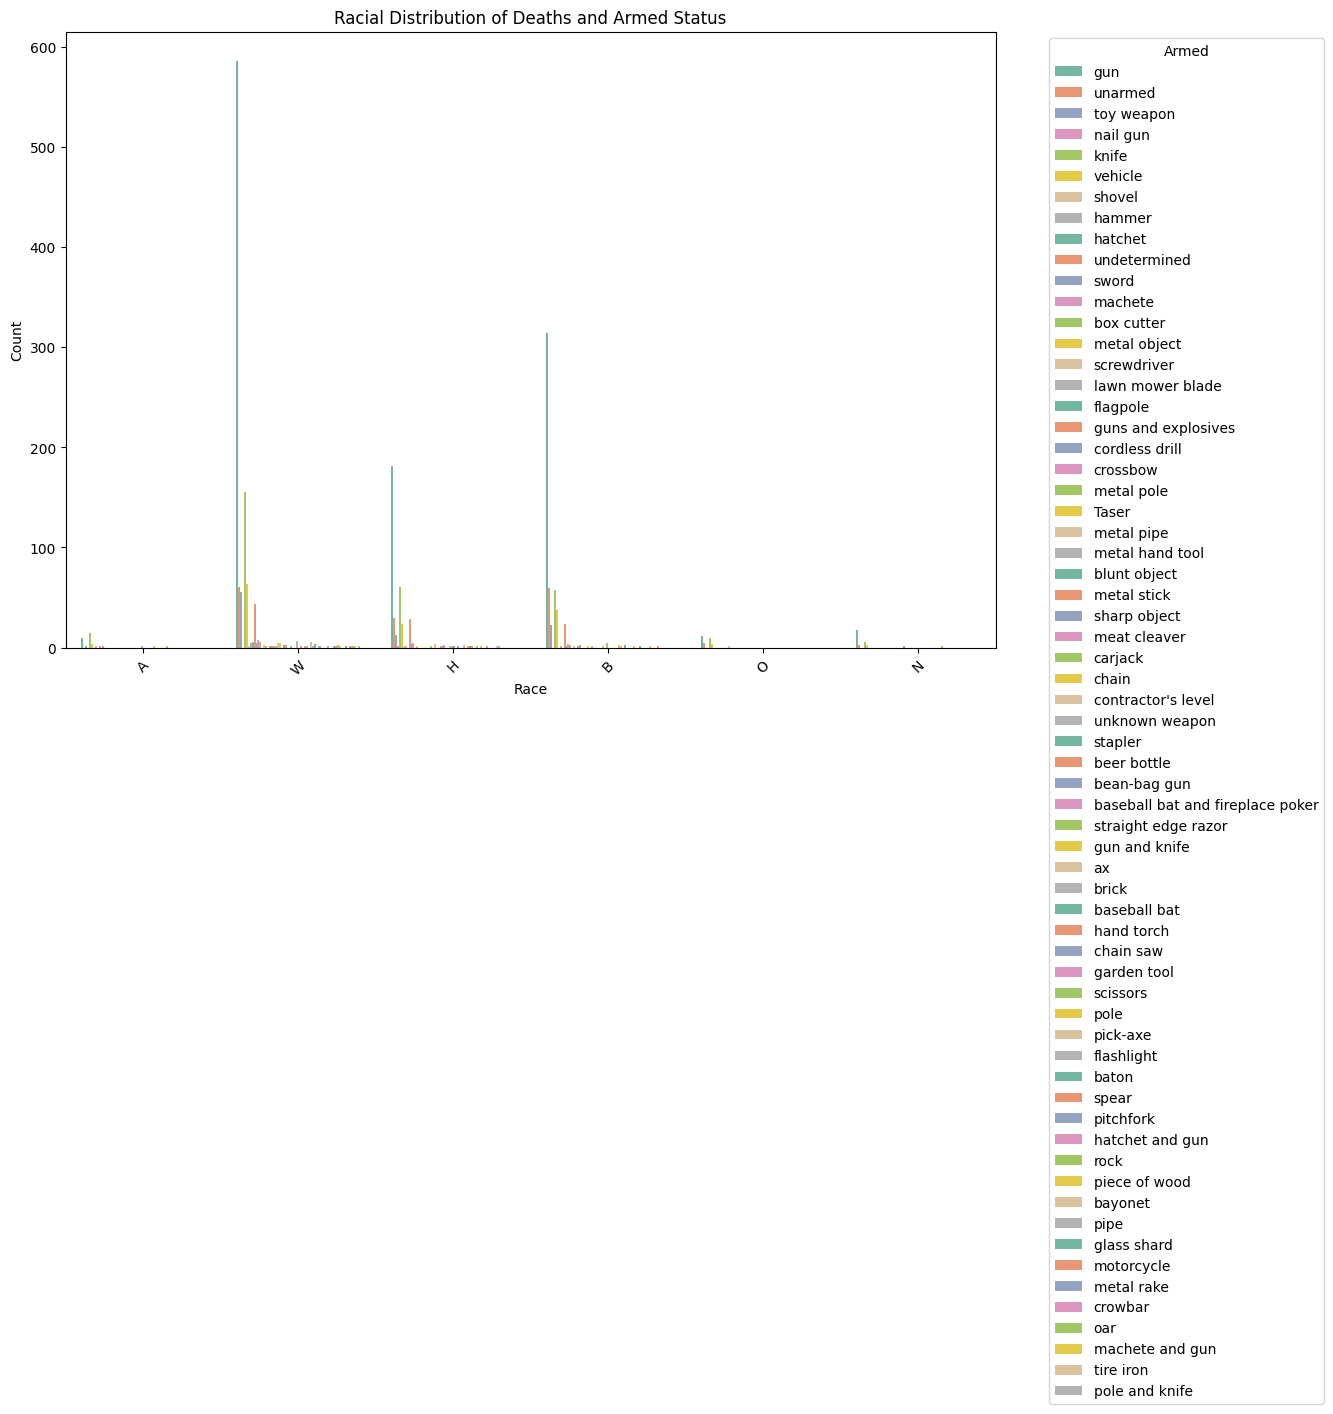

In [49]:
racial_armed_counts = df.groupby(['race', 'armed']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='race', hue='armed', palette='Set2')
plt.title('Racial Distribution of Deaths and Armed Status')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Armed', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

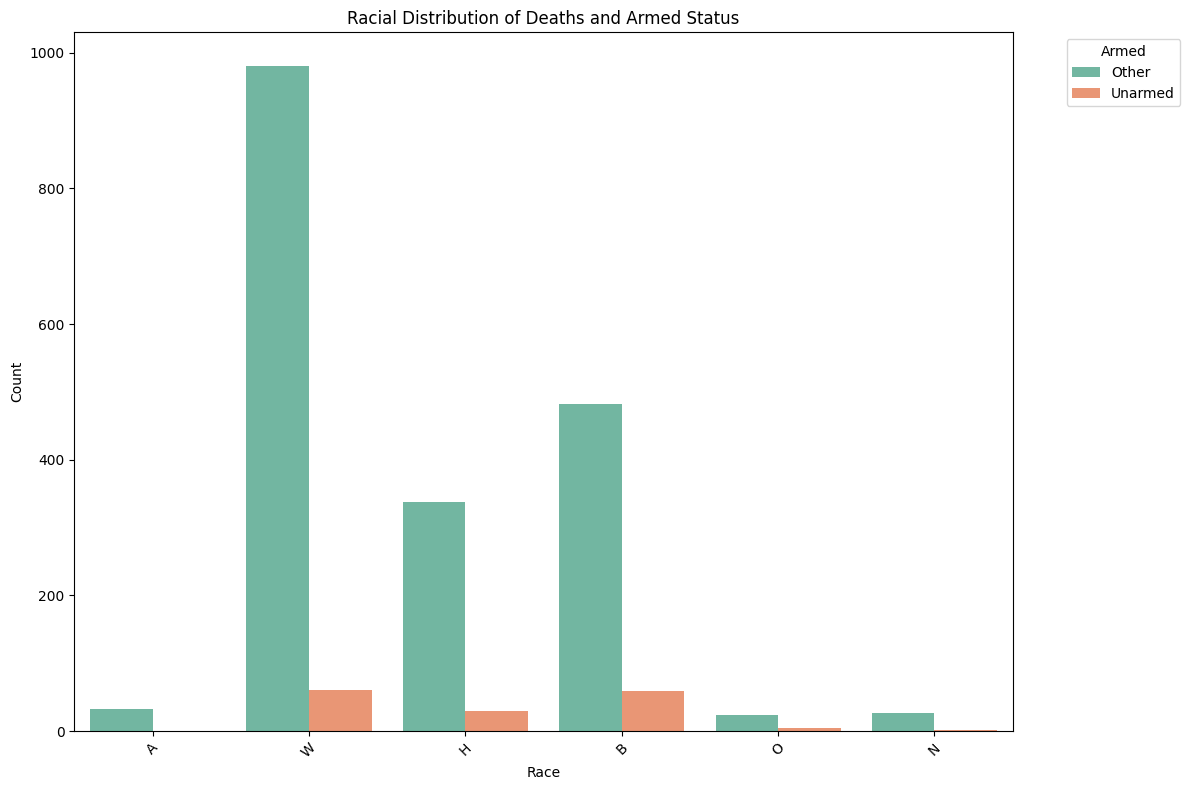

In [317]:
df['body_camera'] = df['armed'].apply(lambda x: 'Unarmed' if x == 'unarmed' else 'Other')
plt.figure(figsize=(12, 8))

sns.countplot(data=df, x='race', hue='armed', palette='Set2')
plt.title('Racial Distribution of Deaths and Armed Status')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Armed', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [332]:
unarmed_deaths = df[df['armed'] == 'unarmed']['armed'].count()
other_armed_deaths = df[df['armed'] != 'unarmed']['armed'].count()

total_population = df3["Total population"].sum()

print("Unarmed shot:",unarmed_deaths) 
print("Armed shot:",other_armed_deaths) 


Unarmed shot: 155
Armed shot: 1981


In [330]:
unarmed_df = df[df['armed'] == 'unarmed']
print(unarmed_df["threat_level"].unique())

fleeing_count = unarmed_df[unarmed_df['flee'] != 'Not fleeing']['flee'].count()

not_fleeing_count = unarmed_df[unarmed_df['flee'] == 'Not fleeing']['flee'].count()

attack_count = unarmed_df[unarmed_df['threat_level'] == 'attack']['threat_level'].count()

not_attack_count = unarmed_df[unarmed_df['threat_level'] != 'attack']['threat_level'].count()



not_fleeing_attack_count = unarmed_df[(unarmed_df['flee'] == 'Not fleeing') & (unarmed_df['threat_level'] == 'attack')].shape[0]
not_attacking_flee_count = unarmed_df[(unarmed_df['threat_level'] != 'attack') & (unarmed_df['flee'] != 'Not fleeing')].shape[0]


print("Flee:", fleeing_count)
print("Not Flee:", not_fleeing_count)
print("Attack:", attack_count)
print("Not Attack:", not_attack_count)
print("---------------------------------------------------")
print("Not Fleeing but Attacking:", not_fleeing_attack_count)
print("Not Attacking but Fleeing :", not_attacking_flee_count)


['other' 'attack' 'undetermined']
Flee: 61
Not Flee: 91
Attack: 57
Not Attack: 98
---------------------------------------------------
Not Fleeing but Attacking: 41
Not Attacking but Fleeing : 48
